# Lesson 1: Cats and Dogs

In [1]:
%matplotlib inline

In [50]:
# set path. let's use sample
path = "data/dogscats"
#path = "data/dogscats/sample"

In [22]:
import os, json
import numpy as np
import utils; reload(utils)
from utils import plots

In [ ]:
import vgg16

In [51]:
vgg = vgg16.Vgg16()


In [11]:
 batches = vgg.get_batches(path+'/train', batch_size=4)
    

Found 16 images belonging to 2 classes.


(array([ 0.5164,  0.3414,  0.6869,  0.1735], dtype=float32),
 array([281, 237, 281, 227]),
 [u'tabby', u'miniature_pinscher', u'tabby', u'kelpie'])

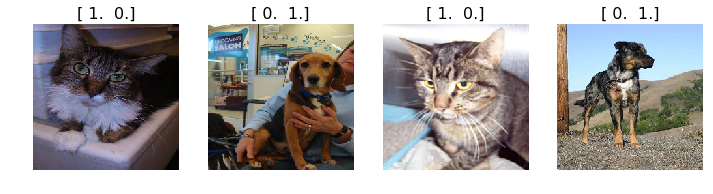

In [35]:
imgs, labels = next(batches)
plots(imgs, titles=labels)
vgg.predict(imgs, True)

(array([ 0.8657,  0.3599,  0.3379,  0.1329], dtype=float32),
 array([244, 233, 285, 179]),
 [u'Tibetan_mastiff',
  u'Bouvier_des_Flandres',
  u'Egyptian_cat',
  u'Staffordshire_bullterrier'])

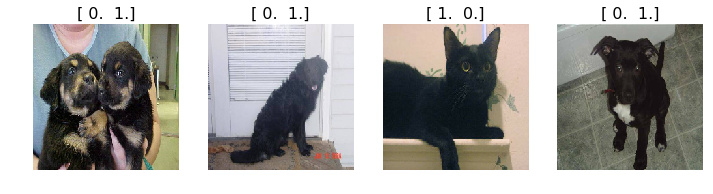

In [36]:
imgs, labels = next(batches)
plots(imgs, titles=labels)
vgg.predict(imgs, True)

(array([ 0.5375,  0.0916,  0.7914,  0.7147], dtype=float32),
 array([285, 281, 234, 244]),
 [u'Egyptian_cat', u'tabby', u'Rottweiler', u'Tibetan_mastiff'])

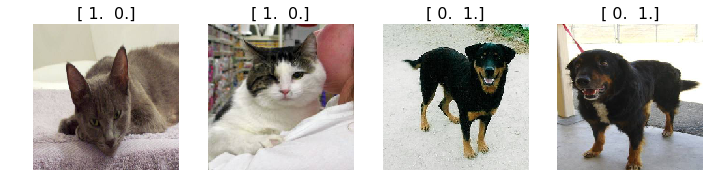

In [37]:
imgs, labels = next(batches)
plots(imgs, titles=labels)
vgg.predict(imgs, True)

(array([ 0.1613,  0.0665,  0.2684,  0.4229], dtype=float32),
 array([333, 380, 158, 151]),
 [u'hamster', u'titi', u'toy_terrier', u'Chihuahua'])

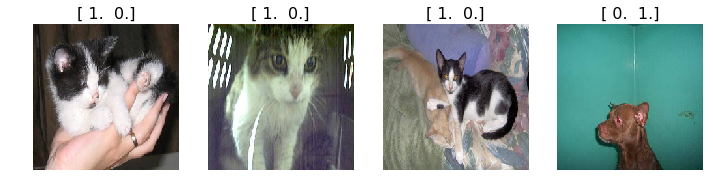

In [38]:
imgs, labels = next(batches)
plots(imgs, titles=labels)
vgg.predict(imgs, True)

Фотки і лейбли -- це завантажені батчі. 
До цього моменту ми просто завантажили фотки і сказали VGG16 визначити, що на них.
VGG16 натренована на 1000 класів. Як результат вона повертає клас, а якому воно найбільше впевнене.
Наприклад, тут для 3ої фотки (на якій 2 коти намальовані), воно визначило `toy_terrier`. 
```
(array([ 0.1613,  0.0665,  0.2684,  0.4229], dtype=float32),
 array([333, 380, 158, 151]),
 [u'hamster', u'titi', u'toy_terrier', u'Chihuahua'])
 ```
Нам треба тепер навчити якось VGG16, що нас цікавлять 2 класи: коти і собаки.

In [52]:
batch_size = 64

In [53]:
batches = vgg.get_batches(path+'/train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'/valid', batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [54]:
vgg.finetune(batches)

In [55]:
vgg.fit(batches=batches, val_batches=val_batches, nb_epoch=10)

Epoch 1/10
23000/23000 [==============================] - 522s - loss: 0.1181 - acc: 0.9675 - val_loss: 0.0696 - val_acc: 0.9855
Epoch 2/10
23000/23000 [==============================] - 521s - loss: 0.0958 - acc: 0.9775 - val_loss: 0.0768 - val_acc: 0.9840
Epoch 3/10
23000/23000 [==============================] - 521s - loss: 0.0973 - acc: 0.9780 - val_loss: 0.0909 - val_acc: 0.9830
Epoch 4/10
23000/23000 [==============================] - 521s - loss: 0.0999 - acc: 0.9779 - val_loss: 0.0923 - val_acc: 0.9810
Epoch 5/10
23000/23000 [==============================] - 521s - loss: 0.1045 - acc: 0.9789 - val_loss: 0.1002 - val_acc: 0.9800
Epoch 6/10
23000/23000 [==============================] - 521s - loss: 0.0951 - acc: 0.9802 - val_loss: 0.0817 - val_acc: 0.9830
Epoch 7/10
  128/23000 [..............................] - ETA: 475s - loss: 0.2723 - acc: 0.9531

KeyboardInterrupt: 

This was run with `sample` dataset, which has 16 images in training set (8+8) and 8 images in validation (4+4).
```
16/16 [==============================] - 0s - loss: 1.0784 - acc: 0.5625 - val_loss: 0.6047 - val_acc: 0.6250
16/16 [==============================] - 0s - loss: 0.8385 - acc: 0.7500 - val_loss: 0.4246 - val_acc: 0.7500
16/16 [==============================] - 0s - loss: 0.6595 - acc: 0.8125 - val_loss: 0.3491 - val_acc: 0.8750
Epoch 1/10
16/16 [==============================] - 0s - loss: 0.1092 - acc: 0.8750 - val_loss: 0.3268 - val_acc: 0.8750
Epoch 2/10
16/16 [==============================] - 0s - loss: 0.2249 - acc: 0.8750 - val_loss: 0.3250 - val_acc: 0.8750
Epoch 3/10
16/16 [==============================] - 0s - loss: 0.2323 - acc: 0.9375 - val_loss: 0.3286 - val_acc: 0.8750
Epoch 4/10
16/16 [==============================] - 0s - loss: 0.0099 - acc: 1.0000 - val_loss: 0.3336 - val_acc: 0.8750
Epoch 5/10
16/16 [==============================] - 0s - loss: 0.0902 - acc: 0.9375 - val_loss: 0.3406 - val_acc: 0.8750
Epoch 6/10
16/16 [==============================] - 0s - loss: 0.0089 - acc: 1.0000 - val_loss: 0.3488 - val_acc: 0.7500
Epoch 7/10
16/16 [==============================] - 0s - loss: 4.4278e-04 - acc: 1.0000 - val_loss: 0.3602 - val_acc: 0.6250
Epoch 8/10
16/16 [==============================] - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.3732 - val_acc: 0.6250
Epoch 9/10
16/16 [==============================] - 0s - loss: 7.1107e-04 - acc: 1.0000 - val_loss: 0.3867 - val_acc: 0.6250
Epoch 10/10
16/16 [==============================] - 0s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.4012 - val_acc: 0.6250
```



training vgg16 with full dataset:
```
Epoch 1/10
23000/23000 [==============================] - 522s - loss: 0.1181 - acc: 0.9675 - val_loss: 0.0696 - val_acc: 0.9855
Epoch 2/10
23000/23000 [==============================] - 521s - loss: 0.0958 - acc: 0.9775 - val_loss: 0.0768 - val_acc: 0.9840
Epoch 3/10
23000/23000 [==============================] - 521s - loss: 0.0973 - acc: 0.9780 - val_loss: 0.0909 - val_acc: 0.9830
Epoch 4/10
23000/23000 [==============================] - 521s - loss: 0.0999 - acc: 0.9779 - val_loss: 0.0923 - val_acc: 0.9810
Epoch 5/10
23000/23000 [==============================] - 521s - loss: 0.1045 - acc: 0.9789 - val_loss: 0.1002 - val_acc: 0.9800
Epoch 6/10
23000/23000 [==============================] - 521s - loss: 0.0951 - acc: 0.9802 - val_loss: 0.0817 - val_acc: 0.9830
```